In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
from sympy import *
from mechanics import System, S
import mechanics.integrator

system = (
    System()
    .add_coordinate(r'\theta', space=S)
    .add_constant('m g l')
    .define('x y', 'l * sin(theta), - l * cos(theta)')
    .define('T', 'm/2 * (diff(x, t)**2 + diff(y, t)**2)')
    .define('U', 'm * g * y')
    .define('L', 'T - U')
    .define('E', 'T + U')
    .euler_lagrange_equation('L')
)
# system('diff(r, t)')
system.show_all()
system.state_space()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(\theta, Derivative(\theta, t))

In [63]:
system_d = (
    system.discretization()
    .add_constant('N h')
    .uniform_space('t', 'i', 0, 'N', 'h')
    .apply(mechanics.integrator.RK4('h'))
    .doit()
    # .add_index('i', 0, 'N')
    # .discretize('i', 't', step='h')
)
system_d.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Unknowns: [y(i,), U(i,), L(i,), {k_{3\ddot{\theta}}}(i,), \dot{\theta}(i + 1,), {k_{4\dot{\theta}}}(i,), x(i,), T(i,), E(i,), {k_{4\ddot{\theta}}}(i,), {k_{2\ddot{\theta}}}(i,), t(i,), {k_{1\dot{\theta}}}(i,), {k_{2\dot{\theta}}}(i,), \theta(i + 1,), {k_{3\dot{\theta}}}(i,), {k_{1\ddot{\theta}}}(i,)]
Variables: (\theta(i,), \dot{\theta}(i,), \ddot{\theta}(i,), {k_{1\dot{\theta}}}(i,), {k_{2\dot{\theta}}}(i,), {k_{3\dot{\theta}}}(i,), {k_{4\dot{\theta}}}(i,), {k_{1\ddot{\theta}}}(i,), {k_{2\ddot{\theta}}}(i,), {k_{3\ddot{\theta}}}(i,), {k_{4\ddot{\theta}}}(i,), t(i,), x(i,), y(i,), T(i,), U(i,), L(i,), E(i,))


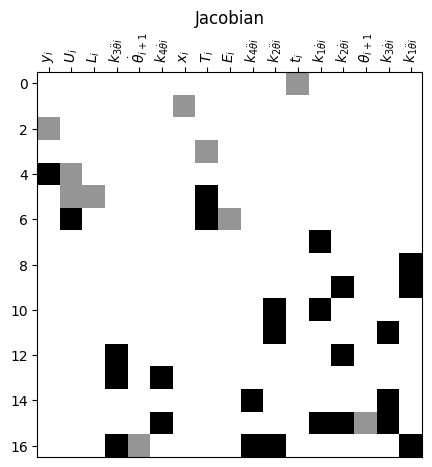

In [61]:
solver = system_d.solver()
solver.plot_jacobian()

In [62]:
import numpy as np
result = solver.run({
    'l': 1,
    'm': 1,
    'g': 1,
    'N': 1000,
    'h': 0.1,
    'theta': np.pi/4,
    'dottheta': 0,
})
# result.newton_converged_iters

i = 0, ..., 1000


  0%|          | 0/1001 [00:00<?, ?it/s]

100%|██████████| 1001/1001 [00:00<00:00, 7725.51it/s]


Text(0, 0.5, 'E')

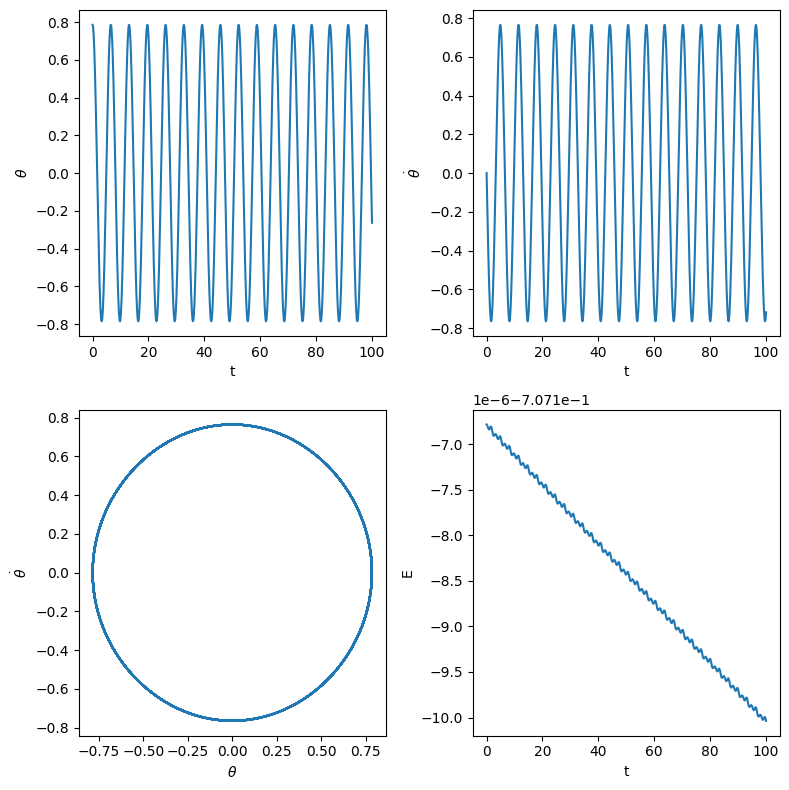

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8), tight_layout=True)
ax = fig.add_subplot(2, 2, 1)
ax.plot(result.t, result.theta)
ax.set_xlabel('t')
ax.set_ylabel(r'$\theta$')

ax = fig.add_subplot(2, 2, 2)
ax.plot(result.t, result.dottheta)
ax.set_xlabel('t')
ax.set_ylabel(r'$\dot{\theta}$')

ax = fig.add_subplot(2, 2, 3)
ax.plot(result.theta, result.dottheta)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\dot{\theta}$')

ax = fig.add_subplot(2, 2, 4)
ax.plot(result.t, result.E)
ax.set_xlabel('t')
ax.set_ylabel('E')

In [ ]:
(1, ) * 3

(1, 1, 1)

In [ ]:
[1,2,3][1:2]

[2]

In [ ]:
() or 2

2

In [ ]:
tuple(1,)

TypeError: 'int' object is not iterable